In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


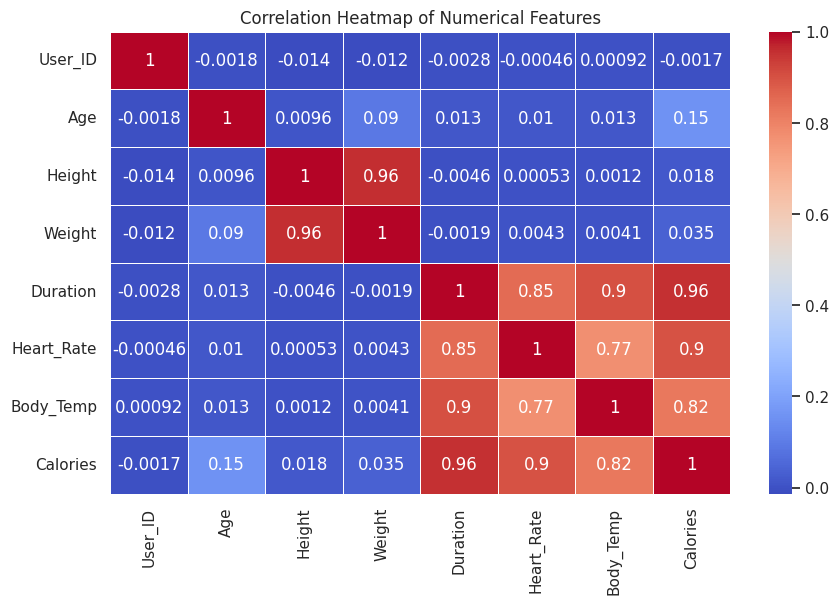

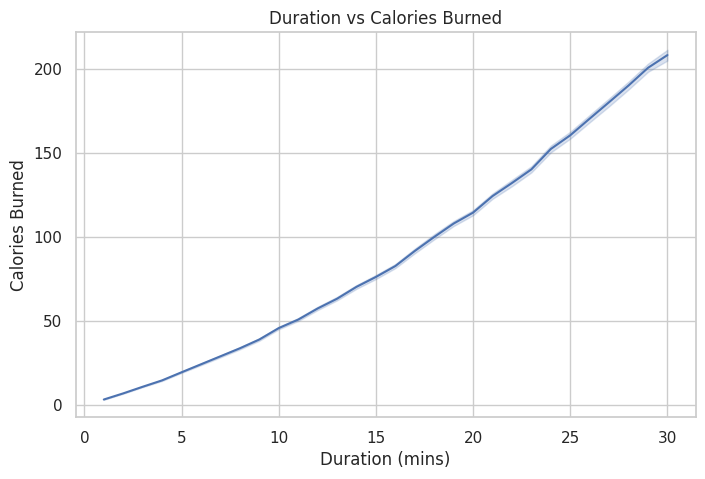

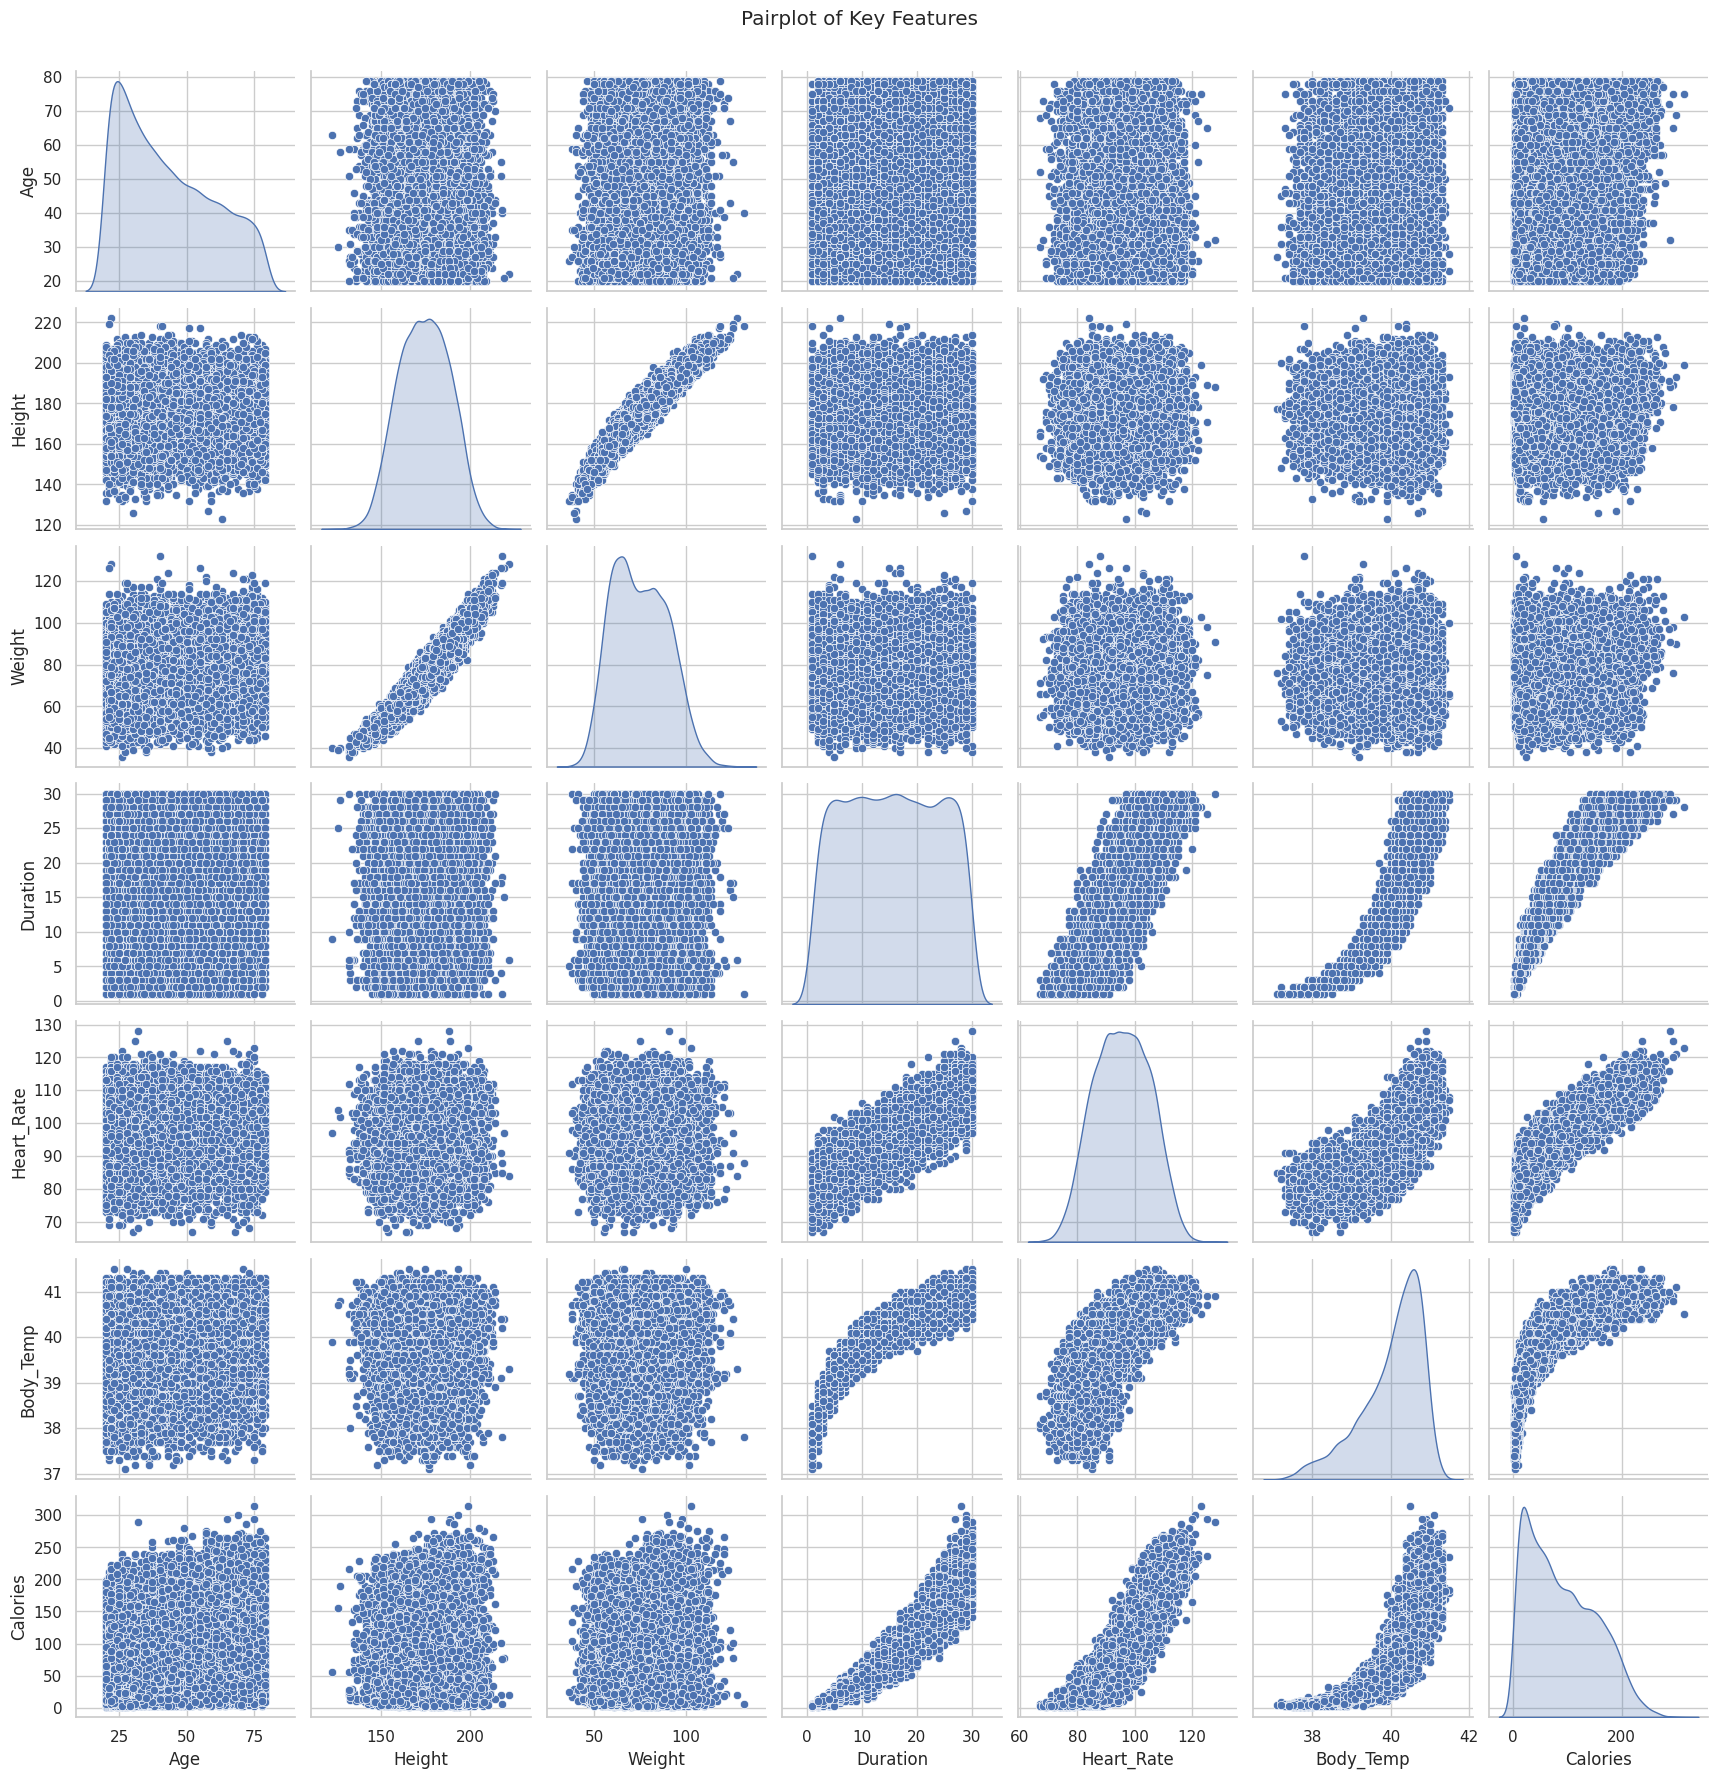

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/drive/MyDrive/calories.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

# Encode categorical variable (Gender)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Feature Selection
X = df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

df['Gender'] = df['Gender'].map({'male': 'Male', 'female': 'Female'})

# Set style
sns.set(style="whitegrid")

# 1Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
# 3️Line Plot - Duration vs Calories Burned
plt.figure(figsize=(8, 5))
sns.lineplot(data=df.sort_values('Duration'), x='Duration', y='Calories')
plt.title("Duration vs Calories Burned")
plt.xlabel("Duration (mins)")
plt.ylabel("Calories Burned")
plt.show()



# 5️Pairplot - All Key Features
sns.pairplot(df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [ ]:
X = df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# Save the Model & Scaler
joblib.dump(model, "calories_model.pkl")
joblib.dump(scaler, "scaler.pkl")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


MAE: 2.510736666666667
MSE: 18.902219766666665
R² Score: 0.9953163537133102


['scaler.pkl']

In [ ]:
r2 = r2_score(y_test, y_pred)
accuracy_like = r2 * 100  # Convert to percentage

print(f"Model Accuracy (R² * 100): {accuracy_like:.2f}%")


Model Accuracy (R² * 100): 99.53%


In [ ]:
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load("calories_model.pkl")
scaler = joblib.load("scaler.pkl")

# Features for input
features = ["Gender (Male=1, Female=0)", "Age", "Height (cm)", "Weight (kg)",
            "Duration (mins)", "Heart Rate (bpm)", "Body Temp (°F)"]

# Collect user input
user_values = []
for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    user_values.append(value)

# Convert input to NumPy array and scale
custom_data = np.array([user_values])
custom_data_scaled = scaler.transform(custom_data)

# Predict Calories Burnt
custom_pred = model.predict(custom_data_scaled)
predicted_calories = custom_pred[0]

print(f"\n🔥 Predicted Calories Burnt: {predicted_calories:.2f} kcal")


Enter value for Gender (Male=1, Female=0): 0
Enter value for Age: 56
Enter value for Height (cm): 145
Enter value for Weight (kg): 56
Enter value for Duration (mins): 45
Enter value for Heart Rate (bpm): 61
Enter value for Body Temp (°F): 42

🔥 Predicted Calories Burnt: 171.66 kcal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, "calories_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from google.colab import files

files.download("calories_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>